In [1]:
!pwd

/c/Users/Amber/Documents/GitHub/DataSciCourse/lessons/lesson-05/code


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

df = pd.read_csv("./datasets/dataset.csv")

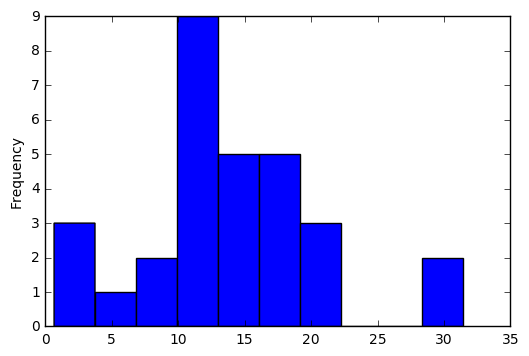

In [3]:
# create a histogram for the dataFrame
measurements = df.measurements
measurements.plot( kind = "hist" )

In [6]:
# find the length of measurements
n = len(measurements)
print n

30


In [11]:
# get the mean and standard_deviation of the dataset
mean = measurements.mean()
print mean

stdev = measurements.std()
print stdev

14.0224282791
6.73042721173


In [12]:
# sort measurements from least to greatest
measurementsSorted = np.sort( measurements )

In [26]:
print( measurementsSorted )

[  0.65420069   2.51073122   3.57326044   6.32880343   9.6196068
   9.68612379   9.93590727   9.95752217  10.43264987  11.52707377
  11.66162395  11.95896084  12.13868406  12.61624737  12.82338917
  14.64197822  14.975124    15.52200558  15.81075811  15.82163004
  16.85730122  16.95646689  17.40759363  17.53112835  17.56077884
  20.1448896   20.22467755  20.95836562  29.37931847  31.45604741]


In [25]:
# generate n numbers from a normal distribution with same mean and stdev
# sort these numbers from least to greatest
# loc = mean, scale = standard deviation, n = from size of measurements 
numsNormal = np.random.normal(loc=mean, scale=stdev, size=n)
numsNormal = np.sort( numsNormal )
print np.sort(numsNormal)

[  4.35612226   6.43667625   8.64332049   9.50954843  10.19345532
  10.58149539  10.91547481  11.81643501  11.84388383  11.94569193
  12.75174959  13.59657268  13.74179056  14.41750454  14.58149694
  15.30982111  15.44480448  15.97446817  16.91416628  17.03806613
  17.40137932  17.46728369  17.99424216  18.64084996  18.839471
  19.12890099  21.95533314  22.87899661  25.53006275  28.94571897]


In [27]:
# generate n numbers from a exponential distribution, note you need the rate parameter for exponential

numsExponential = np.random.exponential( scale = mean, size=n )
numsExponential = np.sort( numsExponential )
print  np.sort( numsExponential )

[  0.49657335   0.65995203   1.51556308   1.58388664   2.00989464
   2.4479165    3.01941713   3.16470721   4.47858549   5.44900395
   5.52925884   8.29027527   9.1182135    9.97692385  10.35400406
  10.85427981  11.27901921  11.41206762  11.57903485  11.87784286
  12.98942411  13.11547316  16.76269644  17.58553478  17.75602459
  18.69211678  25.52392533  31.998697    38.02537283  79.3399314 ]


In [28]:
# generate n numbers from a uniform distribution, note you need a, and b parameters for uniform ( min and max )

minNum = measurements.min()
maxNum = measurements.max()

numsUniform = np.random.uniform( low = minNum, high = maxNum, size = n )
numsUniform = np.sort( numsUniform )
print  np.sort( numsUniform )

[  1.20734732   1.87442416   2.17692816   2.980646     4.65768153
   5.76845528   7.62329924   7.8919977    9.25796716   9.26480758
   9.26702461  10.04973385  10.77948572  11.82812259  14.06657232
  15.70666562  18.15923158  18.73388189  18.74378501  18.9383065
  23.08195151  23.67664944  24.77593827  26.42909623  27.45053913
  28.06963941  28.83131797  29.24254872  30.43197173  31.37085814]


In [29]:
# print a scatter plot of actual quantiles (your sorted dataset) vs hypothetical quantiles (generated numbers)
# from each distribution.

objects = {
            "measurements" : measurementsSorted, 
            "numsNormal"   : numsNormal, 
            "numsExponential" : numsExponential,
            "numsUniform" : numsUniform
          }

df = pd.DataFrame( objects ) 

In [30]:
print df.head()

   measurements  numsExponential  numsNormal  numsUniform
0      0.654201         0.496573    4.356122     1.207347
1      2.510731         0.659952    6.436676     1.874424
2      3.573260         1.515563    8.643320     2.176928
3      6.328803         1.583887    9.509548     2.980646
4      9.619607         2.009895   10.193455     4.657682


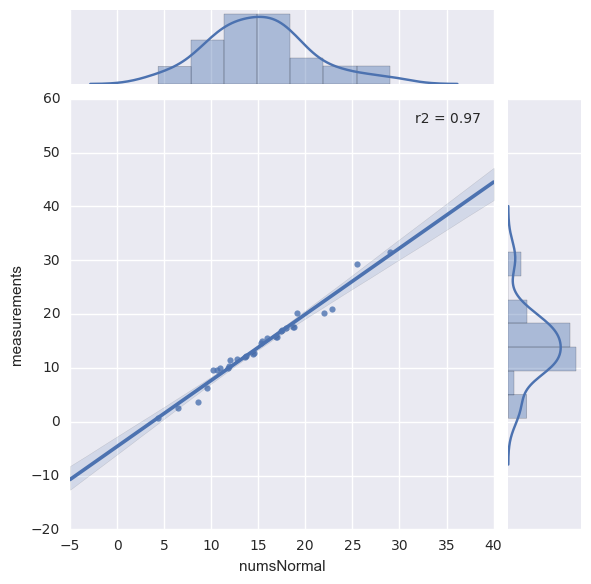

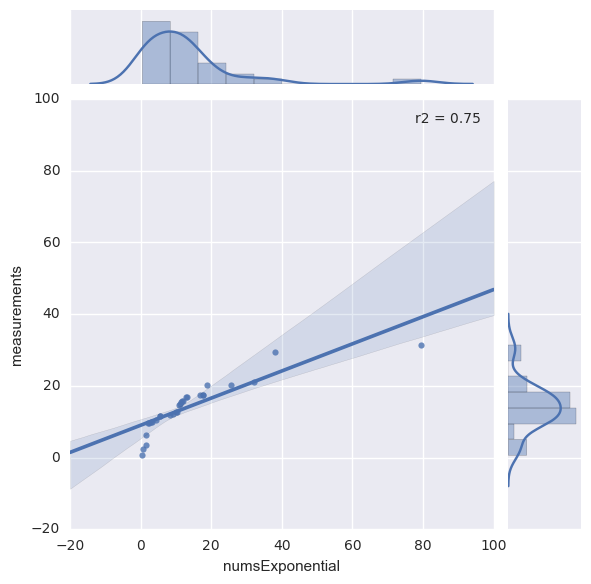

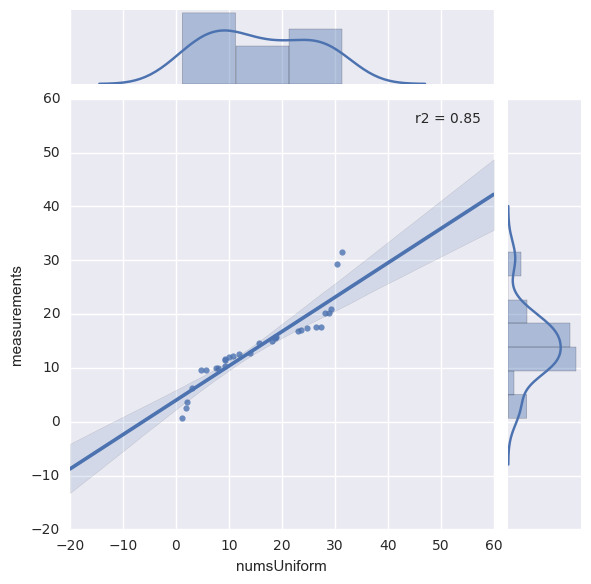

In [31]:
import seaborn as sns
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(df.numsNormal, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsExponential, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsUniform, df.measurements, kind="reg", stat_func=r2)

In [41]:
# import statsmodels.api as smf

import statsmodels.formula.api as smf

In [43]:
formulas = ['measurements ~ numsNormal',
            'measurements ~ numsExponential',
            'measurements ~ numsUniform']

def fitModel(formula):
    return smf.ols(formula, data = df).fit()

# [fitmodel(formula).summary() for formula in formulas]

for formula in formulas:
    results= fitModel(formula)
    print results.summary()

# lm = smf.ols(formula, data = df).fit()
# .fit() machine learning

# print lm.summary()

                            OLS Regression Results                            
Dep. Variable:           measurements   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     921.5
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           5.70e-23
Time:                        20:43:18   Log-Likelihood:                -46.403
No. Observations:                  30   AIC:                             96.81
Df Residuals:                      28   BIC:                             99.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.5986      0.650     -7.076      0.0